In [ ]:
#Employee_Salary_Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Data Manipulation

In [2]:
df = pd.read_csv("hr_analytics_dataset.csv")

In [4]:
df.shape

(500, 11)

In [5]:
df.head()

,EmployeeID,Age,Gender,Department,JobRole,EducationLevel,YearsExperience,PerformanceRating,MonthlySalary,WorkHoursPerWeek,Attrition
0,1001,50,Female,Finance,Manager,Master,34,3,127616,55,No
1,1002,36,Female,Operations,Engineer,Master,25,3,85968,43,No
2,1003,29,Male,HR,Engineer,Master,4,2,36026,40,No
3,1004,42,Male,Finance,Executive,Bachelor,28,2,98577,53,No
4,1005,40,Male,IT,Engineer,Master,19,3,77263,47,Yes


In [6]:
df.tail()

,EmployeeID,Age,Gender,Department,JobRole,EducationLevel,YearsExperience,PerformanceRating,MonthlySalary,WorkHoursPerWeek,Attrition
495,1496,59,Male,IT,Engineer,Master,12,3,63532,42,No
496,1497,28,Female,Finance,Analyst,Bachelor,33,3,102699,42,Yes
497,1498,34,Female,IT,Consultant,Bachelor,21,3,88473,46,No
498,1499,30,Male,Operations,Engineer,Bachelor,22,4,82894,58,No
499,1500,48,Male,HR,Executive,Master,2,4,32889,57,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeID         500 non-null    int64 
 1   Age                500 non-null    int64 
 2   Gender             500 non-null    object
 3   Department         500 non-null    object
 4   JobRole            500 non-null    object
 5   EducationLevel     500 non-null    object
 6   YearsExperience    500 non-null    int64 
 7   PerformanceRating  500 non-null    int64 
 8   MonthlySalary      500 non-null    int64 
 9   WorkHoursPerWeek   500 non-null    int64 
 10  Attrition          500 non-null    object
dtypes: int64(6), object(5)
memory usage: 43.1+ KB


In [ ]:
#Data Preprocessing

In [9]:
#Handling Missing values
df.isnull().sum()

EmployeeID           0
Age                  0
Gender               0
Department           0
JobRole              0
EducationLevel       0
YearsExperience      0
PerformanceRating    0
MonthlySalary        0
WorkHoursPerWeek     0
Attrition            0
dtype: int64

In [94]:
#Analyzing and dropping irrelevant features/columns
df = df.drop(columns=["EmployeeID"], errors="ignore")

In [17]:
#Encoding categorical Variables = #ML models require numerical inputs
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Age,YearsExperience,PerformanceRating,MonthlySalary,WorkHoursPerWeek,Gender_Male,Department_HR,Department_IT,Department_Operations,Department_Sales,JobRole_Consultant,JobRole_Engineer,JobRole_Executive,JobRole_Manager,EducationLevel_Master,EducationLevel_PhD
0,50,34,3,127616,55,False,False,False,False,False,False,False,False,True,True,False
1,36,25,3,85968,43,False,False,False,True,False,False,True,False,False,True,False
2,29,4,2,36026,40,True,True,False,False,False,False,True,False,False,True,False
3,42,28,2,98577,53,True,False,False,False,False,False,False,True,False,False,False
4,40,19,3,77263,47,True,False,True,False,False,False,True,False,False,True,False


In [ ]:
#Feature and target split
X = df_encoded.drop("MonthlySalary", axis = 1)   #X-Predictors
Y = df_encoded["MonthlySalary"]                  #Y-Outcome

In [20]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_scaled

array([[ 0.78600972,  1.64143655, -0.15155897, ...,  2.        ,
         1.35680105, -0.23891934],
       [-0.48204007,  0.75757099, -0.15155897, ..., -0.5       ,
         1.35680105, -0.23891934],
       [-1.11606497, -1.30478198, -1.21887568, ..., -0.5       ,
         1.35680105, -0.23891934],
       ...,
       [-0.66319004,  0.36474185, -0.15155897, ..., -0.5       ,
        -0.73702773, -0.23891934],
       [-1.02548998,  0.46294914,  0.91575773, ..., -0.5       ,
        -0.73702773, -0.23891934],
       [ 0.60485975, -1.50119655,  0.91575773, ..., -0.5       ,
         1.35680105, -0.23891934]])

In [ ]:
#EDA

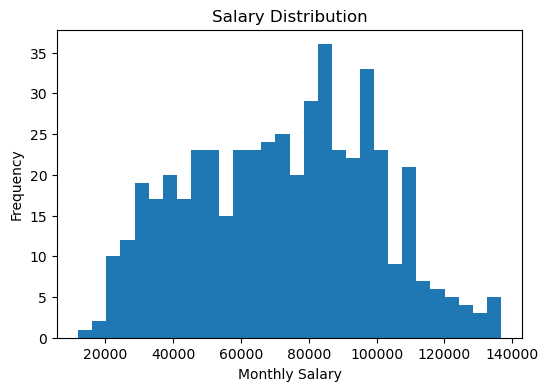

In [24]:
#Salary Distribution
plt.figure(figsize=(6,4))
plt.hist(df["MonthlySalary"], bins=30)
plt.title("Salary Distribution")
plt.xlabel("Monthly Salary")
plt.ylabel("Frequency")
plt.show()

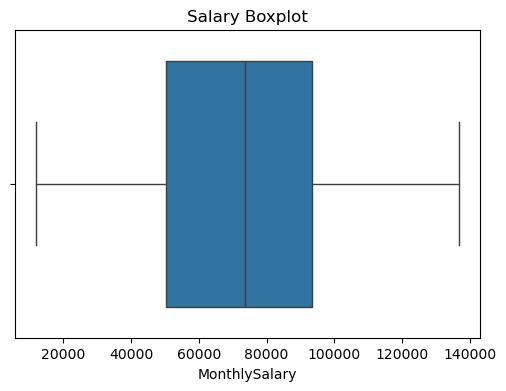

In [25]:
#Boxplot (Outlier detection)
plt.figure(figsize=(6,4))
sns.boxplot(x=df["MonthlySalary"])
plt.title("Salary Boxplot")
plt.show()

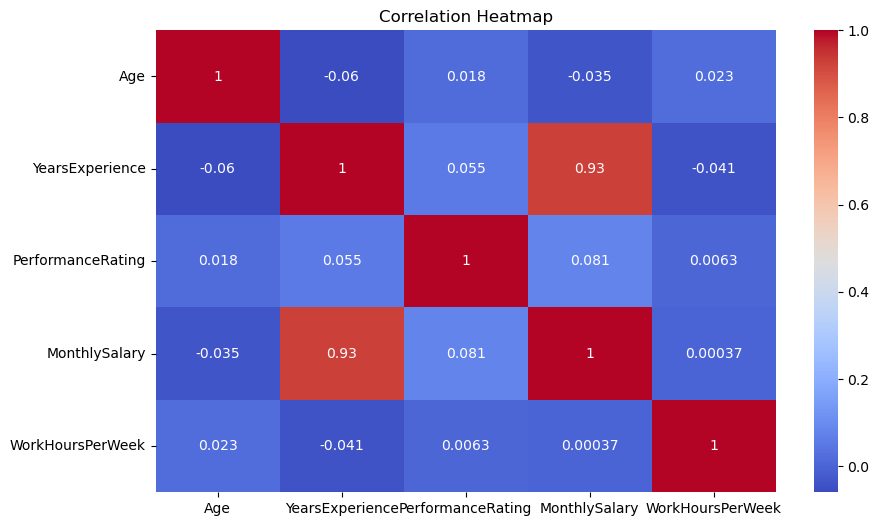

In [26]:
#Correlation Heatmap for multicollinearity and strong predictors
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

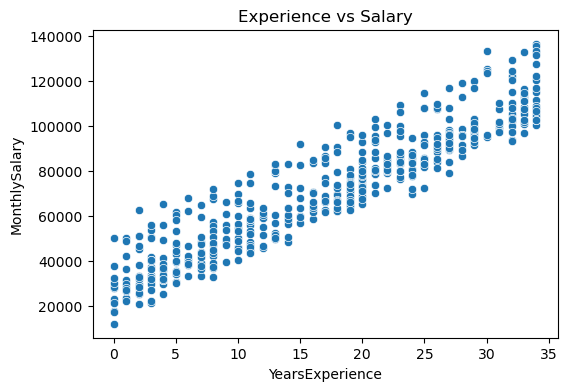

In [27]:
#Experience vs Salary
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["YearsExperience"], y=df["MonthlySalary"])
plt.title("Experience vs Salary")
plt.show()

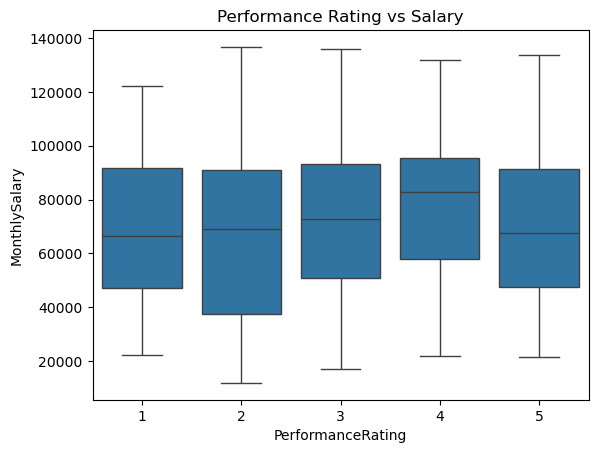

In [28]:
#Performance vs Salary
sns.boxplot(x=df["PerformanceRating"], y=df["MonthlySalary"])
plt.title("Performance Rating vs Salary")
plt.show()

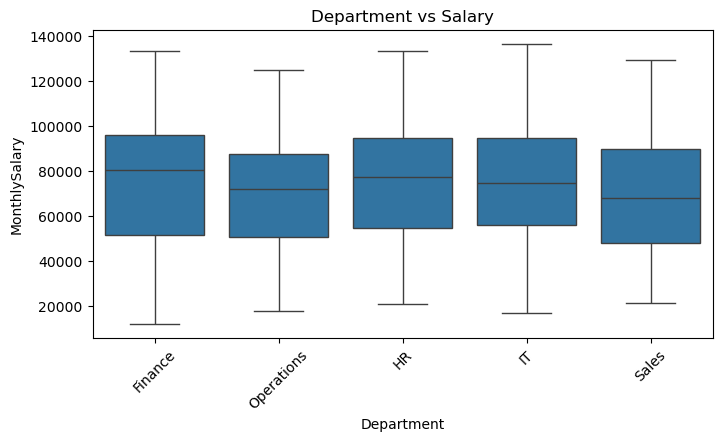

In [29]:
#Department vs Salary
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Department"], y=df["MonthlySalary"])
plt.xticks(rotation=45)
plt.title("Department vs Salary")
plt.show()

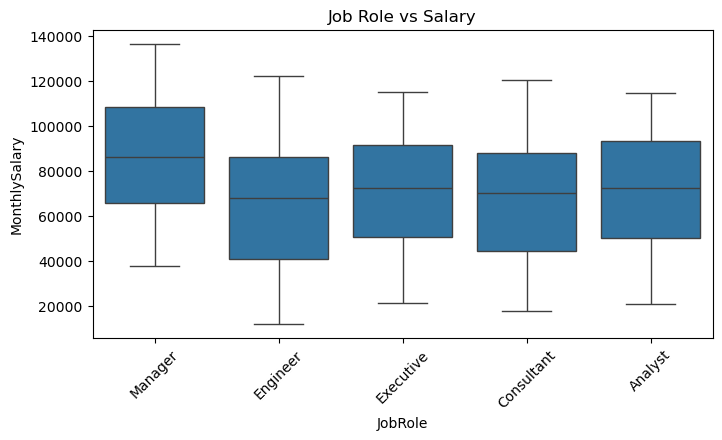

In [31]:
#Job role vs salary
plt.figure(figsize=(8,4))
sns.boxplot(x=df["JobRole"], y=df["MonthlySalary"])
plt.xticks(rotation=45)
plt.title("Job Role vs Salary")
plt.show()

In [ ]:
#Model Building

In [39]:
#Train-test-split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=42
)

In [34]:
#Model 1: Linear Regression (Baseline)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lr = LinearRegression()    #Model Object

In [40]:
lr.fit(X_train, Y_train)   #Model training by adjusting its internal parameters

LinearRegression()

In [49]:
Y_pred_lr = lr.predict(X_test)  #Make prediction using trained model    

In [50]:
Y_pred_lr[:5]

array([ 81477.90550152,  81723.78674231, 103964.46937313,  51068.57009214,
        56385.21332543])

In [74]:
#Evaluation metrics to measure model performance
print("rmse_lr:", np.sqrt(mean_squared_error(Y_test, Y_pred_lr)))
print("r2_lr:", r2_score(Y_test, Y_pred_lr))

rmse_lr: 5199.736109478661
r2_lr: 0.9555432429951751


In [71]:
#Ridge Regression L2
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()   #create an empty ridge model
params = {"alpha": np.logspace(-3, 3, 50)}   #define alpha values(small alpha-linear regression, large alpha - coefficient shrinkage)

#now GridSearchCV performs hyperparameter tuning by trying multiple alpha values, use cross validation, selects best performing one
ridge_cv = GridSearchCV(ridge, params, cv=5)
ridge_cv.fit(X_train, Y_train)

y_pred_ridge = ridge_cv.predict(X_test)

print("Best Alpha (Ridge):", ridge_cv.best_params_)
print("rmse_ridge:", np.sqrt(mean_squared_error(Y_test, y_pred_ridge)))   
print("r2_ridge:", r2_score(Y_test, y_pred_ridge))

#Reduce Overfitting
#Handles Multicollinearity
#Shrinks coefficients

Best Alpha (Ridge): {'alpha': np.float64(0.3727593720314938)}
rmse_ridge: 5193.935677675376
r2_ridge: 0.9556423728558272


In [72]:
#Lasso Regression L1
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(max_iter=10000)    #max_iter ensures the Lasso model gets sufficient iterations to properly minimize the loss function and converge to the best solution. 


params = {"alpha": np.logspace(-3, 3, 50)}

lasso_cv = GridSearchCV(lasso, params, cv=5)
lasso_cv.fit(X_train, Y_train)

y_pred_lasso = lasso_cv.predict(X_test)

print("Best Alpha (Lasso):", lasso_cv.best_params_)
print("rmse_lasso:", np.sqrt(mean_squared_error(Y_test, y_pred_lasso)))
print("r2_lasso:", r2_score(Y_test, y_pred_lasso))

Best Alpha (Lasso): {'alpha': np.float64(184.20699693267164)}
rmse_lasso: 5058.031375395945
r2_lasso: 0.9579333226890802


In [75]:
rmse_lr = np.sqrt(mean_squared_error(Y_test, Y_pred_lr))
rmse_ridge = np.sqrt(mean_squared_error(Y_test, y_pred_ridge))
rmse_lasso = np.sqrt(mean_squared_error(Y_test, y_pred_lasso))

r2_lr = r2_score(Y_test, Y_pred_lr)
r2_ridge = r2_score(Y_test, y_pred_ridge)
r2_lasso = r2_score(Y_test, y_pred_lasso)

In [78]:
#Comparing these models 
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "RMSE": [rmse_lr, rmse_ridge, rmse_lasso],
    "R² Score": [r2_lr, r2_ridge, r2_lasso],
})
results

,Model,RMSE,R² Score
0,Linear Regression,5199.736109,0.955543
1,Ridge Regression,5193.935678,0.955642
2,Lasso Regression,5058.031375,0.957933


In [ ]:
#Final Model Selection 
# Based on model evaluation:

# Lasso Regression achieved the lowest RMSE, indicating better prediction accuracy.

# It also produced the highest R² Score, explaining more variance in employee salaries.

# Additionally, Lasso performs automatic feature selection, simplifying the model by eliminating less important variables.

# 👉 Therefore, Lasso Regression was selected as the final model.

In [79]:
coef = pd.Series(
    lasso_cv.best_estimator_.coef_,
    index=X.columns
)

coef.sort_values()

Department_Operations      -73.433566
Department_IT                0.000000
Gender_Male                  0.000000
Department_HR               -0.000000
EducationLevel_PhD           0.000000
JobRole_Executive            0.000000
JobRole_Consultant          -0.000000
Department_Sales             0.000000
JobRole_Engineer           106.574171
Age                        107.471496
EducationLevel_Master      155.448630
WorkHoursPerWeek           210.591961
PerformanceRating         1415.489172
JobRole_Manager           8549.342948
YearsExperience          25303.500394
dtype: float64

In [80]:
#Identifying removed features
removed_features = coef[coef == 0]
removed_features

Gender_Male           0.0
Department_HR        -0.0
Department_IT         0.0
Department_Sales      0.0
JobRole_Consultant   -0.0
JobRole_Executive     0.0
EducationLevel_PhD    0.0
dtype: float64

In [81]:
#Important features
important_features = coef[coef != 0]
important_features.sort_values()

Department_Operations      -73.433566
JobRole_Engineer           106.574171
Age                        107.471496
EducationLevel_Master      155.448630
WorkHoursPerWeek           210.591961
PerformanceRating         1415.489172
JobRole_Manager           8549.342948
YearsExperience          25303.500394
dtype: float64

Years of experience dominates the most in terms of predicting salary as it has higher magnitude

Now, these steps to evaluated after selecting the best model

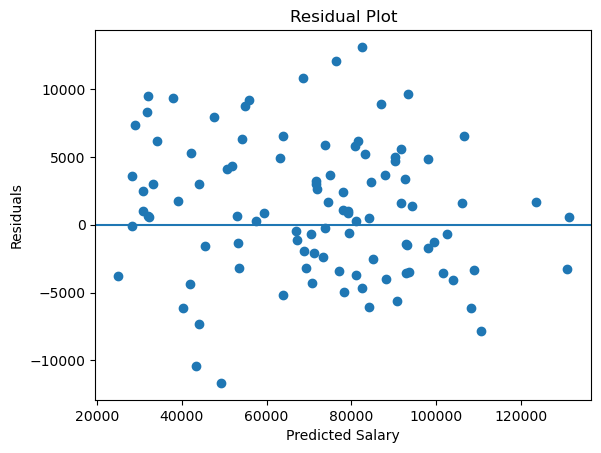

In [86]:
#Residual Analysis for checking bias and should look  random
residuals = Y_test - y_pred_lasso

plt.scatter(y_pred_lasso, residuals)
plt.axhline(y=0)
plt.title("Residual Plot")
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.show()

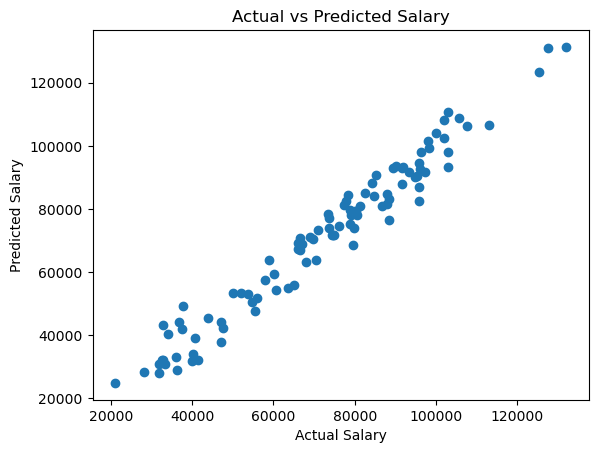

In [ ]:
#Actual VS Predicted plot
plt.scatter(Y_test, y_pred_lasso)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

#Points near diagonal - Good model

“The final model was selected based on evaluation metrics and regularization benefits, with Lasso providing the best balance between accuracy and simplicity.”

In [ ]:
#Evaluating the model

In [92]:
#Selecting the model
final_model = lasso_cv.best_estimator_
final_model

Lasso(alpha=np.float64(184.20699693267164), max_iter=10000)

In [93]:
#Saving the model
import joblib
joblib.dump(final_model, "lasso_salary_model.pkl")

['lasso_salary_model.pkl']

In [95]:
import joblib

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']